In [ ]:
# Don't forget to source ~/.venvs/edic_proteomics/bin/activate !
import keras
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.cross_decomposition import PLSRegression
from sklearn.impute import KNNImputer
wd = "~/Dropbox/Work/Janet Snell-Bergeon/EDIC/Proteomics/Data_Clean/"

In [1]:
# Import data
id_list = pd.read_csv(wd+"id_list.csv")
id_list = id_list.iloc[0:265,]
samples = pd.read_csv(wd+"study_info.csv")
protein_info = pd.read_csv(wd+"proteins.csv")
protein_levels = pd.read_csv(wd+"peptide_groups.csv")
protein_levels.set_index('Sequence',inplace=True)
# Get sample IDs 
ids = ['Abundance_'+str(id) for id in id_list['Raw File Name']]
# Get sample info
samples = id_list.merge(samples[['Subject ID','CARV',"HARD"]],on='Subject ID',how='left')
samples.set_index('Raw File Name',inplace=True)
samples.drop_duplicates(inplace=True)
# X and Y data - log transform X
X = protein_levels[ids].transpose()
X.index = [i.replace("Abundance_","") for i in X.index]
X = np.log(X)
Y = samples["CARV"]
# Drop missing X data
X.dropna(axis=1,inplace=True)
X.dropna(axis=0,inplace=True)

NameError: name 'pd' is not defined

In [3]:
# Impute
# imputer = KNNImputer(n_neighbors=2)
# X_imp = imputer.fit_transform(X)

# CARV

## PLS-DA

In [4]:
# PLS-DA
plsr = PLSRegression(n_components=2, scale=True) 
plsr.fit(X, Y)
plsr.x_scores_.shape

(265, 2)

### Plot

<AxesSubplot:xlabel='0', ylabel='1'>

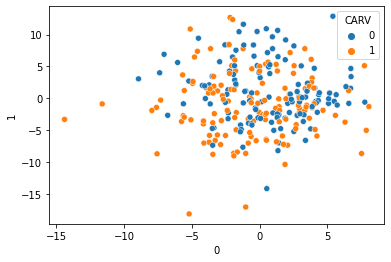

In [5]:
scores = pd.DataFrame(plsr.x_scores_)
scores.index=X.index

sns.scatterplot(data = scores,x = 0,y = 1,hue = Y)

## ANN

In [8]:
# A ANN-SS model using cb.model.NN_SigmoidSigmoid is created and initialised using the optimal hyperparameter values 
# determined in step 4


'/Users/timvigers/GitHub/BDC-Code/Janet Snell-Bergeon/DCCT and EDIC'